# MNIST Classification: Comparing Random Forest, Neural Network, and CNN

This notebook explores the **MNIST dataset**, which consists of handwritten digit images (0-9).  

In [30]:
from abc import ABC, abstractmethod

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader, random_split

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import os

## Define the `MnistClassifierInterface`

In [2]:
class MnistClassifierInterface(ABC):
    """
    This is our interface (abstract base class).
    """
    @abstractmethod
    def train(self, train_loader, epochs=1):
        """
        Trains the classifier on the given train_loader and for the given number of epochs.
        """
        pass

    @abstractmethod
    def predict(self, X):
        """
        Predicts the labels for a given batch of images X.
        """
        pass

## Data Loading and Preprocessing

In [3]:
# Define transformations to normalize data
# Mean and std for MNIST dataset obtained from:
# https://stackoverflow.com/questions/63746182/correct-way-of-normalizing-and-scaling-the-mnist-dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # mean and std for MNIST dataset
])

In [4]:
# Download and create MNIST dataset
dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

In [ ]:
# The MNIST dataset comprises 60,000 training images and 10,000 test images.
# Split the dataset: 50,000 for training and 10,000 for validation.
# This standard split is widely adopted in the machine learning community for benchmarking purposes.
train_dataset, val_dataset = random_split(dataset, [50000, 10000])

In [ ]:
# Also prepare a test dataset 
test_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

In [ ]:
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Visualize some images from the dataset.

In [9]:
def visualize_mnist(dataset, num_images=25, nrows=5, ncols=5, 
                    mean=0.0, std=1.0, shuffle=False):
    """
    Visualize images from the MNIST dataset.
    
    Parameters:
    - dataset: The MNIST dataset object
    - num_images: Number of images to display (default 25)
    - nrows: Number of rows in grid (default 5)
    - ncols: Number of columns in grid (default 5)
    - mean: Mean used in normalization (default 0.0)
    - std: Standard deviation used in normalization (default 1.0)
    - shuffle: Whether to show random images (default False)
    """
    # Ensure we don't request more images than available
    num_images = min(num_images, len(dataset))
    
    # Create figure and axes
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
    axes = axes.flatten()  # Convert to 1D array for easier iteration
    
    # Get indices to show
    if shuffle:
        indices = np.random.choice(len(dataset), num_images, replace=False)
    else:
        indices = range(num_images)
    
    # Plot images
    for i, idx in enumerate(indices):
        img, label = dataset[idx]
        
        # Convert tensor to numpy array and denormalize
        img = img.numpy().squeeze()  # Remove channel dimension
        img = (img * std) + mean     # Reverse normalization
        img = np.clip(img, 0, 1)     # Ensure valid pixel values
        
        # Plot image
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    
    # Hide any unused axes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

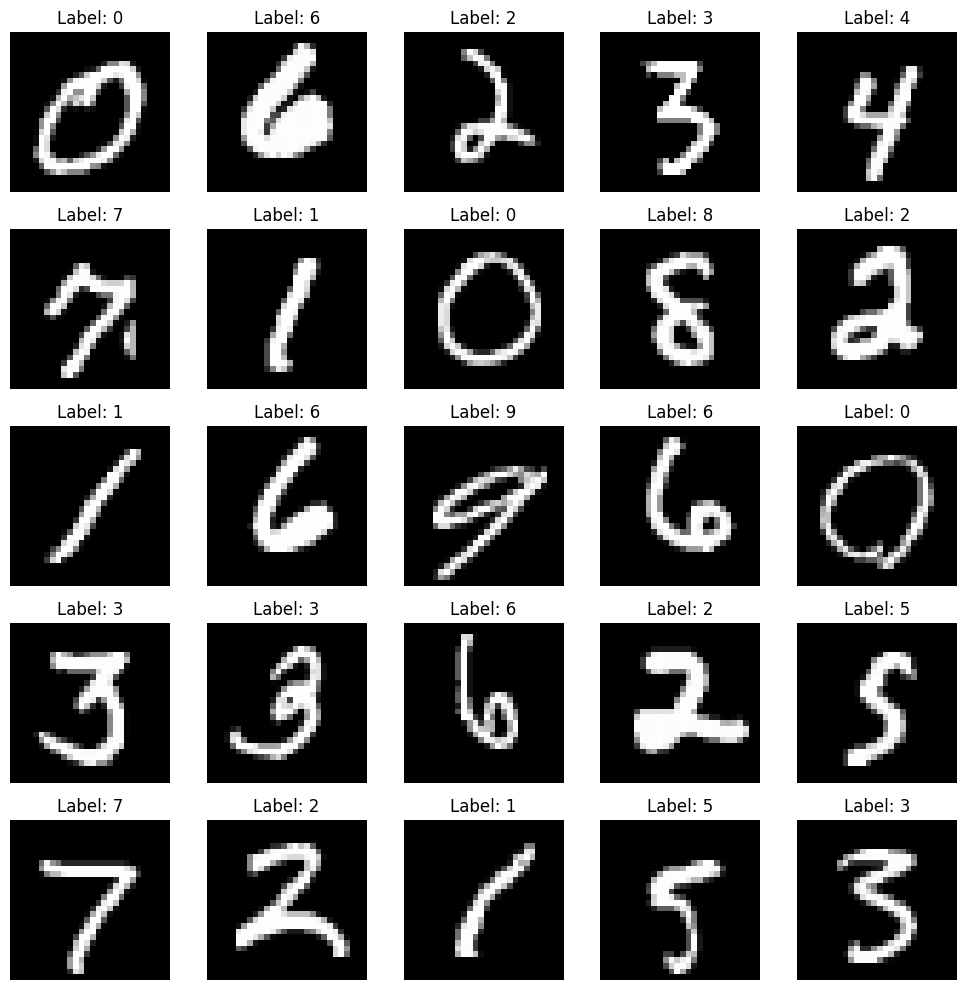

In [15]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'  # Workaround for OpenMP conflict
visualize_mnist(test_dataset, mean=0.1307, std=0.3081, shuffle=True)